# Submission By : Anushkumar K.

# Healthcare Patient Risk Stratification Assignment

### Problem Statement
A care management organisation called WeCare wants to identify among its diabetic patients, the ones that are at high risk of getting re-admitted to the hospital. They wish to intervene by providing some incentive to these patients that will help them improve their health. As the star analyst of this organisation, your job is to identify high-risk diabetic patients through risk stratification. This will help the payer to decide what are the right intervention programs for these patients. 

 

### Business Goal 

Divide your data into training and testing dataset

Train and compare the performance of at least two machine learning algorithms and decide which one to use for predicting risk of readmission for the patient. 

Important feature for each model is calculated. 

Use trained model to stratify your population into 3 risk buckets:

_High risk (Probability of readmission >0.7)_

_Medium risk (0.3 < Probability of readmission < 0.7)_

_Low risk (Probability of readmission < 0.3)_

In [27]:
#Imports and suppress warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes',labelsize=12)
mpl.rc('xtick',labelsize=10)
mpl.rc('ytick',labelsize=10)
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#display max
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [28]:
#Reading and understanding the dataset
healthdf=pd.read_csv('diabetic_data.csv')
healthdf.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [29]:
#Basic understanding of the dataset
healthdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [30]:
healthdf.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [31]:
healthdf.shape

(101766, 50)

In [32]:
#Check unique rows in each columns
healthdf.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [33]:
#check the missing values in each column
for col in healthdf.columns:
    if healthdf[col].dtype == object:
        print(col,healthdf[col][healthdf[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [34]:
#Gender column different values as Unknown/Invalid
print('gender',healthdf['gender'][healthdf['gender'] == 'Unknown/Invalid'].count())

gender 3


#### Data Cleaning and Preparing the data:

In [35]:
#Handling the missing values
def missing(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()* 100).sort_values(ascending=False)
    df=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    print(df[~(df['Total']==0)])
    return

In [36]:
#Missing values total and percentage of missing values
missing(healthdf)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [37]:
healthdf.shape

(101766, 50)

In [38]:
#Remove columns with more irrelevant values
healthdf=healthdf.drop(['citoglipton','examide'], axis=1)

In [39]:
#Categorizing the gender column to 2 values
df =healthdf[healthdf['gender'] == 'Unknown/Invalid'].index
healthdf.drop(df,inplace=True)
healthdf.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [40]:
#Changing the readmitted column to a binary values 'YES' or 'NO'
healthdf['readmitted'] = healthdf['readmitted'].replace('>30', 'YES')
healthdf['readmitted'] = healthdf['readmitted'].replace('<30', 'YES')
healthdf.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,YES
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [41]:
#Replacing the ? with NAN values
healthdf=healthdf.replace('?',np.nan)
healthdf.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,YES
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [42]:
#Imputing the mode value for race column as it is categorical
healthdf['race']=healthdf['race'].fillna(healthdf['race'].mode()[0])
healthdf.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,YES
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [43]:
#Grouping the age buckets into meaningful integers
age_id={'[0-10)':0,
        '[10-20)':10,
        '[20-30)':20,
        '[30-40)':30,
        '[40-50)':40,
        '[50-60)':50,
        '[60-70)':60,
        '[70-80)':70,
        '[80-90)':80,
        '[90-100)':90}
healthdf['age_group']=healthdf.age.replace(age_id)
healthdf=healthdf.drop(['age'],axis=1)
healthdf.head()

,encounter_id,patient_nbr,race,gender,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_group
0,2278392,8222157,Caucasian,Female,NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,YES,10
2,64410,86047875,AfricanAmerican,Female,NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,20
3,500364,82442376,Caucasian,Male,NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,30
4,16680,42519267,Caucasian,Male,NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,40


In [44]:
#Removing the data which has other than integer in the diag_1,diag_2 and diag_3 columns
healthdf=healthdf[~healthdf['diag_1'].astype(str).str.startswith('V')]
healthdf=healthdf[~healthdf['diag_2'].astype(str).str.startswith('V')]
healthdf=healthdf[~healthdf['diag_3'].astype(str).str.startswith('V')]
healthdf=healthdf[~healthdf['diag_1'].astype(str).str.startswith('E')]
healthdf=healthdf[~healthdf['diag_2'].astype(str).str.startswith('E')]
healthdf=healthdf[~healthdf['diag_3'].astype(str).str.startswith('E')]
healthdf=healthdf.drop(['weight','payer_code','medical_specialty'],axis=1)
healthdf.head()

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_group
0,2278392,8222157,Caucasian,Female,6,25,1,1,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,YES,10
3,500364,82442376,Caucasian,Male,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,30
4,16680,42519267,Caucasian,Male,1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,40
5,35754,82637451,Caucasian,Male,2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,YES,50


In [45]:
healthdf=healthdf.dropna()
healthdf.head()

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_group
1,149190,55629189,Caucasian,Female,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,YES,10
3,500364,82442376,Caucasian,Male,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,30
4,16680,42519267,Caucasian,Male,1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,40
5,35754,82637451,Caucasian,Male,2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,YES,50
7,63768,114882984,Caucasian,Male,1,1,7,5,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,YES,70


In [46]:
healthdf.shape

(91842, 45)

In [47]:
healthdf.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'age_group'], dtype='object')

In [48]:
#Deriving a new column comorbidity from diag_1 and diag_3 values
def categories(x):
    x=float(x)
    
    #Diabetes
    if np.floor(x)==250:
        return 1
    #circulatory diseases
    elif (x>=390 and x<=459):
        return 2
    else:
        return 0

healthdf['diag1_categories']=healthdf['diag_1'].apply(lambda x:categories(x))
healthdf['diag3_categories']=healthdf['diag_3'].apply(lambda x:categories(x))

def comorbidity_risk(healthdf):
    if(healthdf['diag1_categories']==1 and healthdf['diag3_categories']==0) or (healthdf['diag1_categories']==0 and healthdf['diag3_categories']==1):
        return 1
    elif(healthdf['diag1_categories']==2 and healthdf['diag3_categories']==0) or (healthdf['diag1_categories']==0 and healthdf['diag3_categories']==2):
        return 2
    elif(healthdf['diag1_categories']==1 and healthdf['diag3_categories']==2) or (healthdf['diag1_categories']==2 and healthdf['diag3_categories']==1):
        return 3
    else:
        return 0

healthdf['comorbidity_risk'] = healthdf.apply(comorbidity_risk,axis=1)
healthdf.head()

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_group,diag1_categories,diag3_categories,comorbidity_risk
1,149190,55629189,Caucasian,Female,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,YES,10,0,0,0
3,500364,82442376,Caucasian,Male,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,30,0,2,2
4,16680,42519267,Caucasian,Male,1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,40,0,1,1
5,35754,82637451,Caucasian,Male,2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,YES,50,2,1,3
7,63768,114882984,Caucasian,Male,1,1,7,5,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,YES,70,2,1,3


In [49]:
healthdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91842 entries, 1 to 101765
Data columns (total 48 columns):
encounter_id                91842 non-null int64
patient_nbr                 91842 non-null int64
race                        91842 non-null object
gender                      91842 non-null object
admission_type_id           91842 non-null int64
discharge_disposition_id    91842 non-null int64
admission_source_id         91842 non-null int64
time_in_hospital            91842 non-null int64
num_lab_procedures          91842 non-null int64
num_procedures              91842 non-null int64
num_medications             91842 non-null int64
number_outpatient           91842 non-null int64
number_emergency            91842 non-null int64
number_inpatient            91842 non-null int64
diag_1                      91842 non-null object
diag_2                      91842 non-null object
diag_3                      91842 non-null object
number_diagnoses            91842 non-null int64
max

### EXPLANATORY DATA ANALYSIS

In [50]:
healthdf.shape

(91842, 48)

#### Plotting and infering from few categorical columns

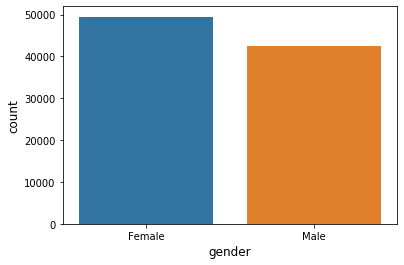

In [51]:
sns.countplot(healthdf['gender'])
plt.show()

#### Inference:
We infer from the above that female patients are more than male population.

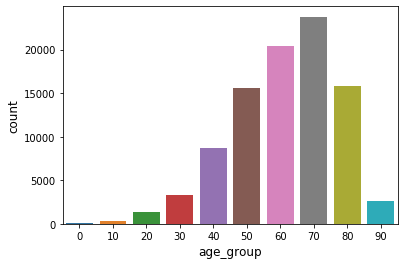

In [52]:
sns.countplot(healthdf['age_group'])
plt.show()

#### Inference:

The patients who suffer from diabetes are more from 50-80 years of age.

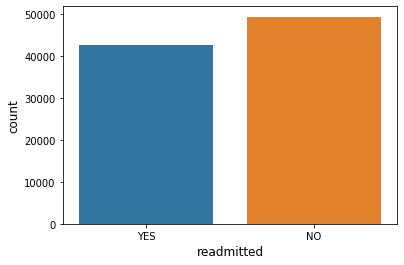

In [53]:
sns.countplot(healthdf['readmitted'])
plt.show()

#### Inference:

More number of patients are readmitted in the given dataset.

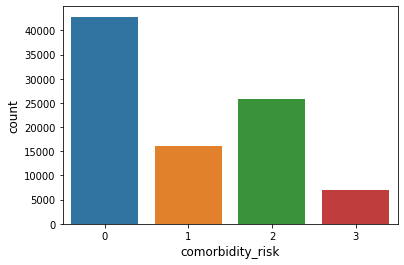

In [54]:
sns.countplot(healthdf['comorbidity_risk'])
plt.show()

#### Inference:

We have more patients Comorbidity risk as 1.

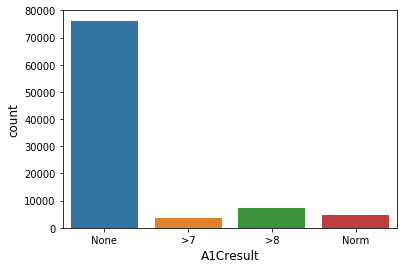

In [55]:
sns.countplot(healthdf['A1Cresult'])
plt.show()

#### Inference:

There are lot of patients who has not yet taken an AICTest.

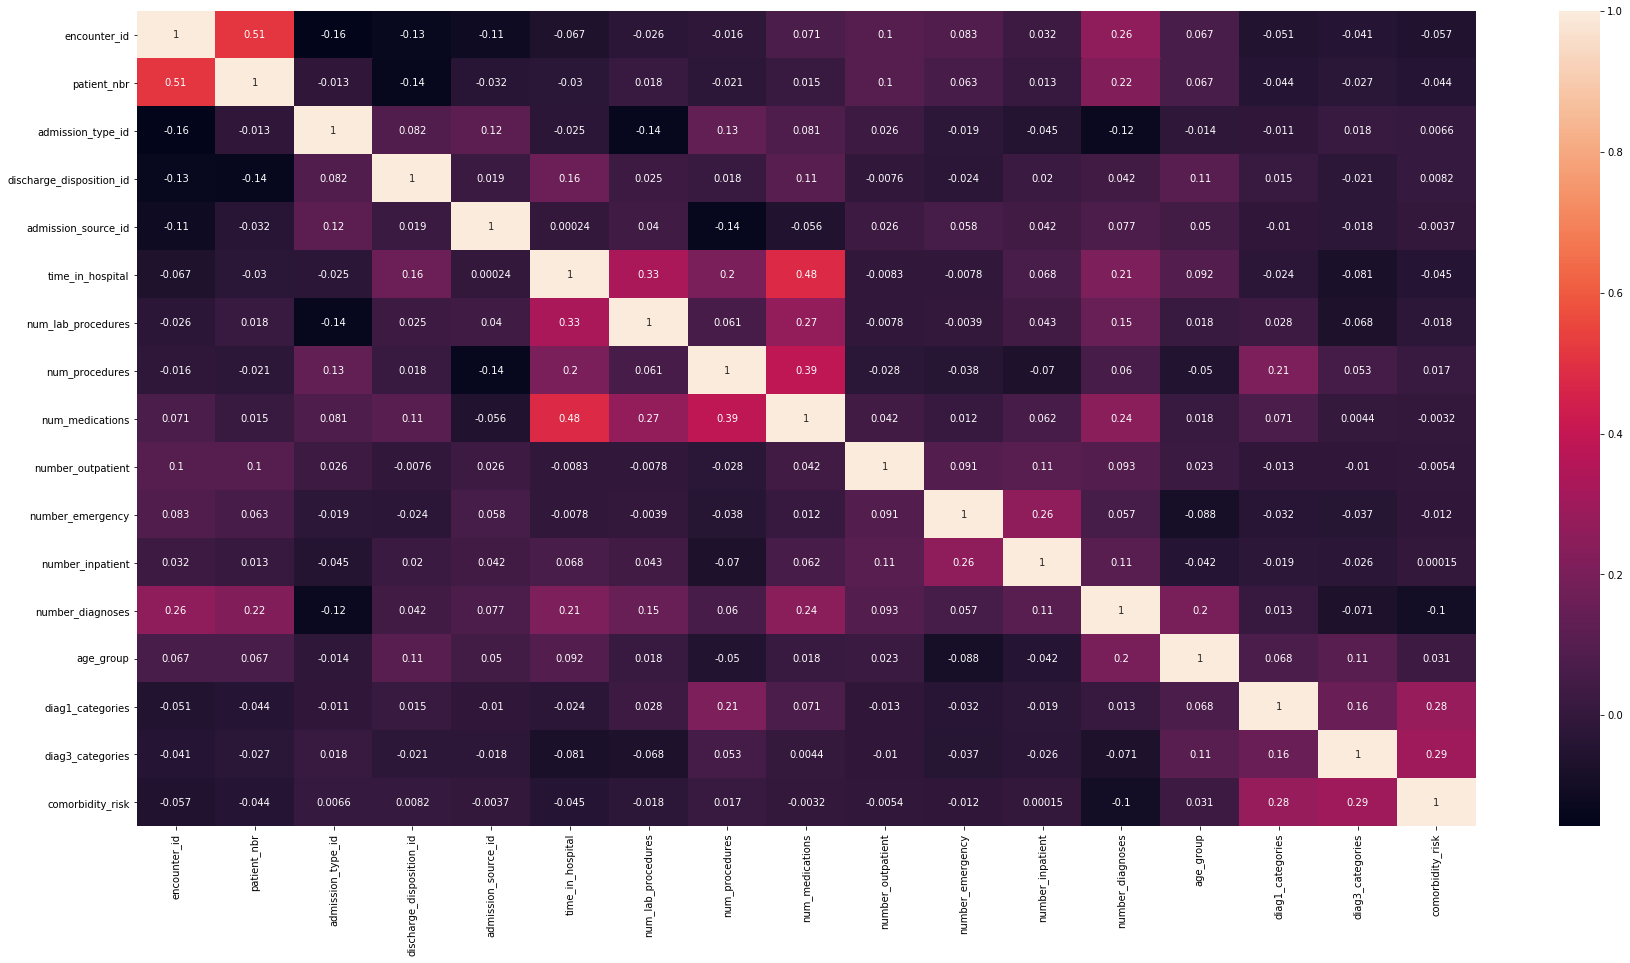

In [59]:
#Correlation between features
plt.figure(figsize=(30,15))
corr_healthdf=healthdf.corr()
sns.heatmap(corr_healthdf,annot=True)
plt.show()

In [60]:
#Drop unrequired columns
healthdf = healthdf.drop(['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'],axis=1)
healthdf.head()

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,age_group,diag1_categories,diag3_categories,comorbidity_risk
1,149190,55629189,Caucasian,Female,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,Ch,Yes,YES,10,0,0,0
3,500364,82442376,Caucasian,Male,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,Ch,Yes,NO,30,0,2,2
4,16680,42519267,Caucasian,Male,1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,Ch,Yes,NO,40,0,1,1
5,35754,82637451,Caucasian,Male,2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,Yes,YES,50,2,1,3
7,63768,114882984,Caucasian,Male,1,1,7,5,73,0,12,0,0,0,428,492,250,8,None,None,No,Yes,YES,70,2,1,3


In [61]:
healthdf = healthdf.drop(['race','patient_nbr'],axis=1)
healthdf.head()

,encounter_id,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,age_group,diag1_categories,diag3_categories,comorbidity_risk
1,149190,Female,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,Ch,Yes,YES,10,0,0,0
3,500364,Male,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,Ch,Yes,NO,30,0,2,2
4,16680,Male,1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,Ch,Yes,NO,40,0,1,1
5,35754,Male,2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,Yes,YES,50,2,1,3
7,63768,Male,1,1,7,5,73,0,12,0,0,0,428,492,250,8,None,None,No,Yes,YES,70,2,1,3


In [62]:
#Creating dummies for the categorical columns
healthdf['change']=healthdf['change'].replace('Ch',1)
healthdf['change']=healthdf['change'].replace('No',0)
healthdf['gender']=healthdf['gender'].replace('Male',1)
healthdf['gender']=healthdf['gender'].replace('Female',0)
healthdf['diabetesMed']=healthdf['diabetesMed'].replace('Yes',1)
healthdf['diabetesMed']=healthdf['diabetesMed'].replace('No',0)
healthdf.head()

,encounter_id,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,age_group,diag1_categories,diag3_categories,comorbidity_risk
1,149190,0,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,1,1,YES,10,0,0,0
3,500364,1,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,1,1,NO,30,0,2,2
4,16680,1,1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,1,1,NO,40,0,1,1
5,35754,1,2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,0,1,YES,50,2,1,3
7,63768,1,1,1,7,5,73,0,12,0,0,0,428,492,250,8,None,None,0,1,YES,70,2,1,3


In [63]:
healthdf['A1Cresult'] = healthdf['A1Cresult'].replace('>7', 1)
healthdf['A1Cresult'] = healthdf['A1Cresult'].replace('>8', 1)
healthdf['A1Cresult'] = healthdf['A1Cresult'].replace('Norm', 0)
healthdf['A1Cresult'] = healthdf['A1Cresult'].replace('None', -99)

healthdf['max_glu_serum'] = healthdf['max_glu_serum'].replace('>200', 1)
healthdf['max_glu_serum'] = healthdf['max_glu_serum'].replace('>300', 1)
healthdf['max_glu_serum'] = healthdf['max_glu_serum'].replace('Norm', 0)
healthdf['max_glu_serum'] = healthdf['max_glu_serum'].replace('None', -99)

healthdf.head()

,encounter_id,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,age_group,diag1_categories,diag3_categories,comorbidity_risk
1,149190,0,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,-99,-99,1,1,YES,10,0,0,0
3,500364,1,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,-99,-99,1,1,NO,30,0,2,2
4,16680,1,1,1,7,1,51,0,8,0,0,0,197,157,250,5,-99,-99,1,1,NO,40,0,1,1
5,35754,1,2,1,2,3,31,6,16,0,0,0,414,411,250,9,-99,-99,0,1,YES,50,2,1,3
7,63768,1,1,1,7,5,73,0,12,0,0,0,428,492,250,8,-99,-99,0,1,YES,70,2,1,3


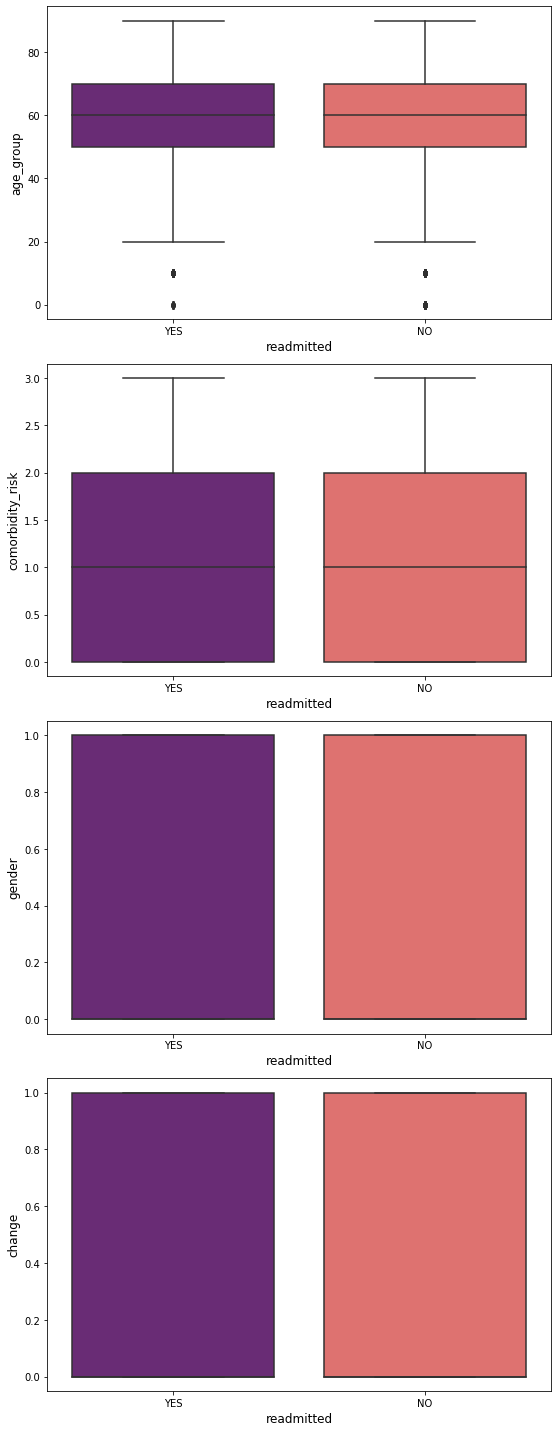

In [64]:
def plots(x,fig):
    plt.subplot(4,2,fig)
    sns.boxplot(x=healthdf.readmitted,y=healthdf[x],palette=("magma"))

plt.figure(figsize=(15,20))
plots('age_group',1)
plots('comorbidity_risk',3)
plots('gender',5)
plots('change',7)
plt.tight_layout()

In [65]:
#Target variable
healthdf['readmitted'] = healthdf['readmitted'].replace('YES', 1)
healthdf['readmitted'] = healthdf['readmitted'].replace('NO', 0)
healthdf.head()

,encounter_id,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,age_group,diag1_categories,diag3_categories,comorbidity_risk
1,149190,0,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,-99,-99,1,1,1,10,0,0,0
3,500364,1,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,-99,-99,1,1,0,30,0,2,2
4,16680,1,1,1,7,1,51,0,8,0,0,0,197,157,250,5,-99,-99,1,1,0,40,0,1,1
5,35754,1,2,1,2,3,31,6,16,0,0,0,414,411,250,9,-99,-99,0,1,1,50,2,1,3
7,63768,1,1,1,7,5,73,0,12,0,0,0,428,492,250,8,-99,-99,0,1,1,70,2,1,3


### MODEL BUILDING -I

In [66]:
#Splitting to test and train data
from sklearn.model_selection import train_test_split
healthdf_train,healthdf_test=train_test_split(healthdf,train_size=0.7,test_size=0.3,random_state=100)
print(healthdf_train.shape)
print(healthdf_test.shape)

(64289, 25)
(27553, 25)


In [67]:
#Scaling of features
number_of_cols=['admission_type_id','discharge_disposition_id','time_in_hospital','num_lab_procedures','num_procedures','num_medications','diag_1','diag_2','diag_3','number_diagnoses','age_group']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
healthdf_train[number_of_cols]=scaler.fit_transform(healthdf_train[number_of_cols])
healthdf_test[number_of_cols]=scaler.fit_transform(healthdf_test[number_of_cols])
healthdf_train.head()

,encounter_id,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,age_group,diag1_categories,diag3_categories,comorbidity_risk
49356,149527464,1,0.285714,0.0,4,0.307692,0.396947,0.666667,0.6250,0,0,1,0.412651,0.408451,0.399598,0.230769,-99,-99,1,1,0,0.555556,2,2,0
96615,377893598,1,0.142857,0.0,7,0.000000,0.251908,0.500000,0.1125,0,0,0,0.816265,0.883300,0.883534,0.461538,-99,-99,0,0,0,0.777778,0,0,0
79155,242606280,0,0.285714,0.0,1,0.076923,0.206107,1.000000,0.0375,1,0,0,0.412651,0.582495,0.456827,0.307692,-99,-99,1,1,1,0.666667,2,2,0
44326,136714278,1,0.000000,0.0,7,0.461538,0.213740,0.500000,0.3875,0,0,6,0.595382,0.600604,0.402610,0.461538,-99,-99,1,1,1,0.666667,0,2,2
70930,204462978,0,0.000000,0.0,7,0.230769,0.251908,0.000000,0.2000,0,0,0,0.489960,0.424547,0.248795,0.461538,-99,-99,1,1,1,0.777778,0,1,1


In [68]:
#Popping out the dependent and categorical variable
y_train=healthdf_train.pop('readmitted')
x_train=healthdf_train
y_test=healthdf_test.pop('readmitted')
x_test=healthdf_test
print(len(x_train.columns))
print(len(x_test.columns))

24
24


In [69]:
#Using RFE for feature selection process
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linearmodel=LinearRegression()
linearmodel.fit(x_train,y_train)
rfe=RFE(linearmodel,8)
rfe=rfe.fit(x_train,y_train)
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('encounter_id', False, 17),
 ('gender', False, 11),
 ('admission_type_id', True, 1),
 ('discharge_disposition_id', True, 1),
 ('admission_source_id', False, 14),
 ('time_in_hospital', True, 1),
 ('num_lab_procedures', True, 1),
 ('num_procedures', True, 1),
 ('num_medications', False, 9),
 ('number_outpatient', False, 6),
 ('number_emergency', False, 4),
 ('number_inpatient', True, 1),
 ('diag_1', False, 7),
 ('diag_2', False, 3),
 ('diag_3', False, 8),
 ('number_diagnoses', True, 1),
 ('max_glu_serum', False, 15),
 ('A1Cresult', False, 16),
 ('change', False, 10),
 ('diabetesMed', True, 1),
 ('age_group', False, 2),
 ('diag1_categories', False, 5),
 ('diag3_categories', False, 13),
 ('comorbidity_risk', False, 12)]

In [70]:
cols=x_train.columns[rfe.support_]
cols

Index(['admission_type_id', 'discharge_disposition_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'number_inpatient', 'number_diagnoses', 'diabetesMed'], dtype='object')

In [71]:
#x_train with rfe cols
x_train_rfe=x_train[cols]
x_train_rfe.head()

,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,number_inpatient,number_diagnoses,diabetesMed
49356,0.285714,0.0,0.307692,0.396947,0.666667,1,0.230769,1
96615,0.142857,0.0,0.000000,0.251908,0.500000,0,0.461538,0
79155,0.285714,0.0,0.076923,0.206107,1.000000,0,0.307692,1
44326,0.000000,0.0,0.461538,0.213740,0.500000,6,0.461538,1
70930,0.000000,0.0,0.230769,0.251908,0.000000,0,0.461538,1


In [72]:
import statsmodels.api as sm
#x_train_rfe=sm.add_constant(x_train_rfe)
lm=sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:             readmitted   R-squared (uncentered):                   0.486
Model:                            OLS   Adj. R-squared (uncentered):              0.486
Method:                 Least Squares   F-statistic:                              7608.
Date:                Mon, 29 Jun 2020   Prob (F-statistic):                        0.00
Time:                        21:52:53   Log-Likelihood:                         -45037.
No. Observations:               64289   AIC:                                  9.009e+04
Df Residuals:                   64281   BIC:                                  9.016e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [73]:
#calculate the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['variables']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values,1) for i in range(x_train_rfe.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,variables,VIF
0,admission_type_id,1.302787
1,discharge_disposition_id,1.302787
2,time_in_hospital,1.302787
3,num_lab_procedures,1.302787
4,num_procedures,1.302787
5,number_inpatient,1.302787
6,number_diagnoses,1.302787
7,diabetesMed,1.302787


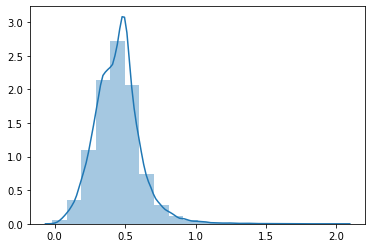

In [74]:
y_train_predict=lm.predict(x_train_rfe)
fig=plt.figure()
sns.distplot((y_train_predict),bins=20)
plt.show()

In [75]:
x_test_newdf=x_test[x_train_rfe.columns]
x_test_newdf.head()

,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,number_inpatient,number_diagnoses,diabetesMed
88337,0.000000,0.185185,0.384615,0.570312,0.000000,0,0.461538,1
59174,0.285714,0.000000,0.000000,0.226562,0.166667,0,0.307692,0
87058,0.000000,0.000000,0.307692,0.515625,0.000000,0,0.384615,1
66755,0.000000,0.000000,0.230769,0.429688,0.000000,1,0.461538,1
2509,0.714286,0.185185,0.538462,0.476562,0.000000,0,0.307692,1


In [76]:
#Adding constant
#x_test_newdf=sm.add_constant(x_test_newdf)
y_pred=lm.predict(x_test_newdf)
y_pred.head()

88337    0.540793
59174    0.266133
87058    0.491522
66755    0.593104
2509     0.546454
dtype: float64

### Important Features

The important features are:

1.admission_type_id

2.discharge_disposition_id

3.time_in_hospital

4.num_lab_procedures

5.num_procedures

6.number_inpatient

7.number_diagnoses

8.diabetesMed

#### R2 Value of the Model:

R2 value from OLS linear regression is 0.48

### MODEL-II : 

### Logistic Regression

In [77]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca=PCA(svd_solver='randomized',random_state=42)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [78]:
pca.components_

array([[ 1.00000000e+00,  2.36097471e-11, -3.16002856e-10,
        -2.52365691e-10, -4.37913911e-09, -1.48920301e-10,
        -3.72428954e-11, -3.80394486e-11,  7.14771721e-11,
         1.30318805e-09,  7.76419370e-10,  3.82149937e-10,
        -1.49003452e-12,  1.20997870e-10,  8.01291959e-11,
         3.57880909e-10, -3.53144967e-08,  8.15811055e-09,
         4.69741191e-10,  2.30463424e-10,  1.12699757e-10,
        -4.47944922e-10, -3.27380176e-10, -5.63894674e-10],
       [-1.02847994e-08,  2.28284792e-04, -3.65820613e-04,
        -9.72208218e-05, -1.77063661e-03,  4.70225104e-04,
         1.06426801e-03, -4.61129436e-05,  7.67976775e-05,
        -8.58604070e-04, -3.01337181e-04, -2.12136153e-03,
        -2.46780546e-04, -8.28751986e-05, -4.31935291e-05,
        -9.50497029e-07, -6.04870622e-02,  9.98161896e-01,
         1.13927953e-03,  7.56372021e-04, -4.95034780e-04,
         1.13333469e-03, -5.53574038e-04,  5.90618244e-04],
       [ 3.49992298e-08,  2.59641831e-05,  3.54767538e

In [79]:
pca.explained_variance_ratio_

array([1.00000000e+00, 1.34347190e-13, 4.56185663e-14, 1.18407740e-15,
       1.73836479e-16, 1.37731043e-16, 1.29632756e-16, 7.47900387e-17,
       6.59672613e-17, 5.78694818e-17, 3.04754294e-17, 2.34063977e-17,
       9.55771075e-18, 8.36943534e-18, 5.27078672e-18, 3.69924362e-18,
       3.29112309e-18, 3.03745433e-18, 2.78364093e-18, 2.71959788e-18,
       2.44697440e-18, 1.60433380e-18, 1.36324824e-18, 5.47304162e-19])

In [80]:
#Using incrmental PCA 
from sklearn.decomposition import IncrementalPCA
pca_final=IncrementalPCA(n_components=20)
X_train_pca=pd.DataFrame(pca_final.fit_transform(x_train))
X_train_pca.shape

(64289, 20)

In [81]:
#Creating correlation matrix for principal components
corrmat=np.corrcoef(X_train_pca.transpose())
corr_diag=corrmat-np.diagflat(corrmat.diagonal())
print("maximum correlation :",corr_diag.max())
print("minimum correlation :",corr_diag.min())

maximum correlation : 0.0017822045454321893
minimum correlation : -0.0020782571161965776


In [82]:
#Logistic Regression on PCA dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train_pca,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
#Making prediction on test data
X_test_pca=pca_final.transform(x_test)
y_pred=lr.predict(X_test_pca)
y_pred[:5]
print("Accuracy:{}".format(accuracy_score(y_test,y_pred)))

Accuracy:0.5047726200413748


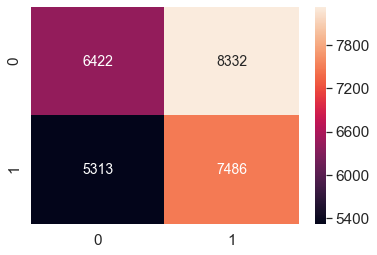

In [84]:
df_confusion = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_confusion, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()

In [85]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
print(precision)
print(recall)

Sensitivity:0.585
Specificity:0.435
0.47325831331394613
0.5848894444878506


In [87]:
pred_prob_test=lr.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(roc_auc_score(y_test,pred_prob_test)))

AUC:0.51


### Inference from the above models for patient readmission

We performed the PCA reduction tehnique on the dataset for dimensionality reduction and applied Logistic Regression on the reduced dataset to predict if the patients will be readmitted or not.

Recall would be the perfect indicator for identifying the patient readmission.

In Linear Regression we have got the better R2 squared value of 0.48 when compared to the recall value of the Logistic regression which is 0.58.

#### Linear Regression

R2 Score : 0.48


#### Logistic Regression:

Sensitivity:0.585

Specificity:0.435

AUC Score:0.51

Recall : 0.58

From the above metrics we could observe that, best performing model is Logistic Regression where we got the better recall score and was able to get the coefficients for the features appropriately.

### Risk Stratification on the test data:

In [112]:
x_test.head()

,encounter_id,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,age_group,diag1_categories,diag3_categories,comorbidity_risk,risk_stratification
88337,283690548,0,0.000000,0.185185,7,0.384615,0.570312,0.000000,0.287671,0,0,0,0.035141,0.680121,0.995976,0.461538,-99,-99,1,1,0.666667,0,0,0,Low Risk
59174,166823736,0,0.285714,0.000000,1,0.000000,0.226562,0.166667,0.054795,0,0,0,0.438755,0.423814,0.398390,0.307692,-99,-99,0,0,0.777778,2,2,0,Low Risk
87058,277484748,0,0.000000,0.000000,7,0.307692,0.515625,0.000000,0.054795,0,0,0,0.780120,0.596367,0.272636,0.384615,-99,-99,0,1,0.777778,0,0,0,Low Risk
66755,186702996,0,0.000000,0.000000,7,0.230769,0.429688,0.000000,0.246575,0,0,1,0.489960,0.104945,0.732394,0.461538,-99,-99,1,1,0.777778,0,0,0,Low Risk
2509,16319028,1,0.714286,0.185185,17,0.538462,0.476562,0.000000,0.328767,0,0,0,0.425703,0.419778,0.706237,0.307692,-99,-99,1,1,0.777778,2,0,2,Medium Risk


In [113]:
x_test.shape

(27553, 25)

In [114]:
#Risk stratification calculated based on the A1Cresult and the comorbidity_risk columns

def risk_stratification(x_test):
    if(x_test['A1Cresult']==1 and x_test['comorbidity_risk']==3) or (x_test['A1Cresult']==-99 and x_test['comorbidity_risk']==3):
        return "High Risk"
    elif(x_test['A1Cresult']==1 and x_test['comorbidity_risk']==2) or (x_test['A1Cresult']==-99 and x_test['comorbidity_risk']==2) or (x_test['A1Cresult']==-99 and x_test['comorbidity_risk']==1) or (x_test['A1Cresult']==1 and x_test['comorbidity_risk']==1):
        return "Medium Risk"
    else:
        return "Low Risk"

x_test['risk_stratification'] = x_test.apply(risk_stratification,axis=1)
x_test.head()

,encounter_id,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,age_group,diag1_categories,diag3_categories,comorbidity_risk,risk_stratification
88337,283690548,0,0.000000,0.185185,7,0.384615,0.570312,0.000000,0.287671,0,0,0,0.035141,0.680121,0.995976,0.461538,-99,-99,1,1,0.666667,0,0,0,Low Risk
59174,166823736,0,0.285714,0.000000,1,0.000000,0.226562,0.166667,0.054795,0,0,0,0.438755,0.423814,0.398390,0.307692,-99,-99,0,0,0.777778,2,2,0,Low Risk
87058,277484748,0,0.000000,0.000000,7,0.307692,0.515625,0.000000,0.054795,0,0,0,0.780120,0.596367,0.272636,0.384615,-99,-99,0,1,0.777778,0,0,0,Low Risk
66755,186702996,0,0.000000,0.000000,7,0.230769,0.429688,0.000000,0.246575,0,0,1,0.489960,0.104945,0.732394,0.461538,-99,-99,1,1,0.777778,0,0,0,Low Risk
2509,16319028,1,0.714286,0.185185,17,0.538462,0.476562,0.000000,0.328767,0,0,0,0.425703,0.419778,0.706237,0.307692,-99,-99,1,1,0.777778,2,0,2,Medium Risk


In [115]:
print(x_test['risk_stratification'].value_counts())

Low Risk       13455
Medium Risk    12093
High Risk       2005
Name: risk_stratification, dtype: int64


#### As per the above risk stratification based on the A1CResult and comorbidity from the train dataset we observe,

1.Nearly 49% are at __Low Risk__ as per above.

2.Almost 44% of the people are in __Medium Risk__ as per above analysis.

3.7% of the people are in __High Risk__ as per the above analysis.

#### Hence the organisation has to focus on to bring the 7% High Risk to Medium Risk and 44% of the patients from Medium Risk to Low Risk.